In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gspec
import numpy as np

# Import and Assess

In [81]:
df = pd.read_csv("./data/Dataset.csv", sep=";")
df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df.describe(include="all")

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,111733.000000,111733,107561.000000,111733.000000,111733,110732,111733.000000,111733.000000,111733.000000,111733.000000,...,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000
unique,NaN,199,NaN,NaN,107584,103480,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,FRA,NaN,NaN,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16516,NaN,NaN,75,3032,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,55867.000000,NaN,45.639191,595.026599,NaN,NaN,60.833147,283.851283,64.682802,0.002282,...,0.000770,0.003132,0.001629,0.016181,0.363268,0.156811,0.000331,0.003598,0.000197,0.087718
std,32254.683151,NaN,17.244952,374.657382,NaN,NaN,85.115320,379.131556,123.580715,0.080631,...,0.027733,0.055881,0.040327,0.126173,0.480943,0.363624,0.018195,0.059874,0.014031,0.282886
min,1.000000,NaN,-10.000000,36.000000,NaN,NaN,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27934.000000,NaN,33.000000,288.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55867.000000,NaN,47.000000,522.000000,NaN,NaN,21.000000,208.000000,31.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83800.000000,NaN,58.000000,889.000000,NaN,NaN,95.000000,393.300000,84.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [83]:
df.shape

(111733, 29)

In [84]:
df.dtypes

ID                        int64
Nationality              object
Age                     float64
DaysSinceCreation         int64
NameHash                 object
DocIDHash                object
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: object

# Exploratory Data Analysis

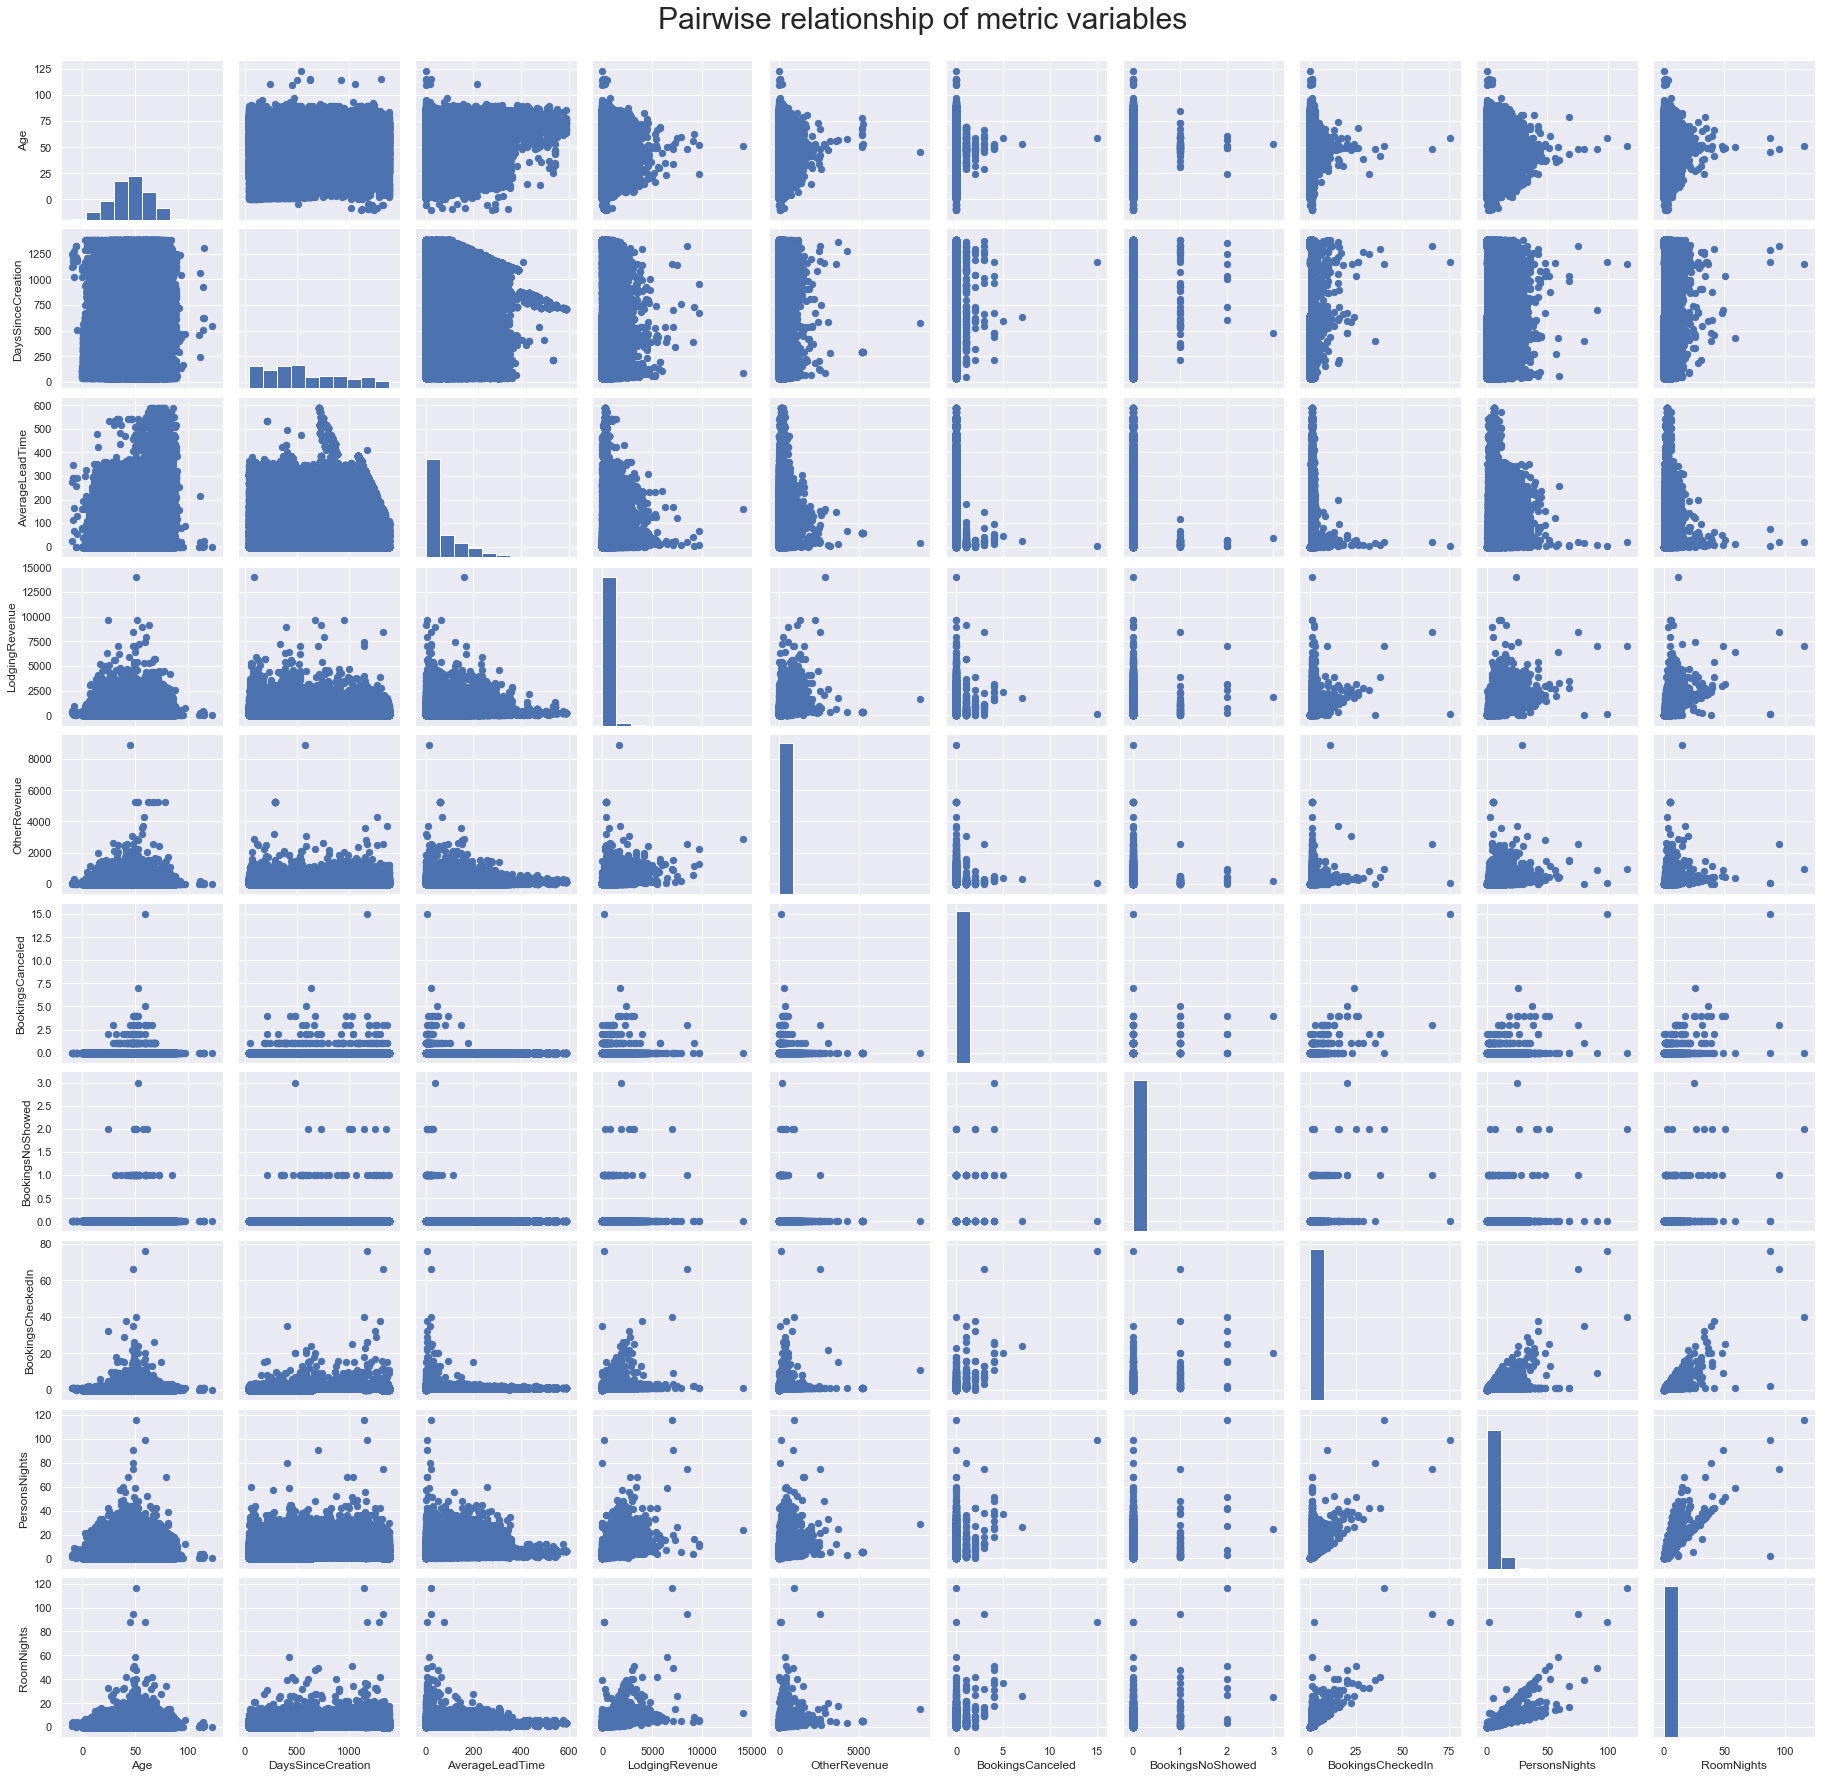

In [96]:
# data
metric_df = df.loc[:, (df.dtypes!="object") & (~df.columns.str.contains("SR"))]

sns.set()

# Setting pairgrid
g = sns.PairGrid(metric_df.drop("ID",1).dropna())

# Populating pairgrid
mdg = g.map_diag(plt.hist)
mog = g.map_offdiag(plt.scatter, s=40)
    
# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise relationship of metric variables", fontsize=30)

plt.show()

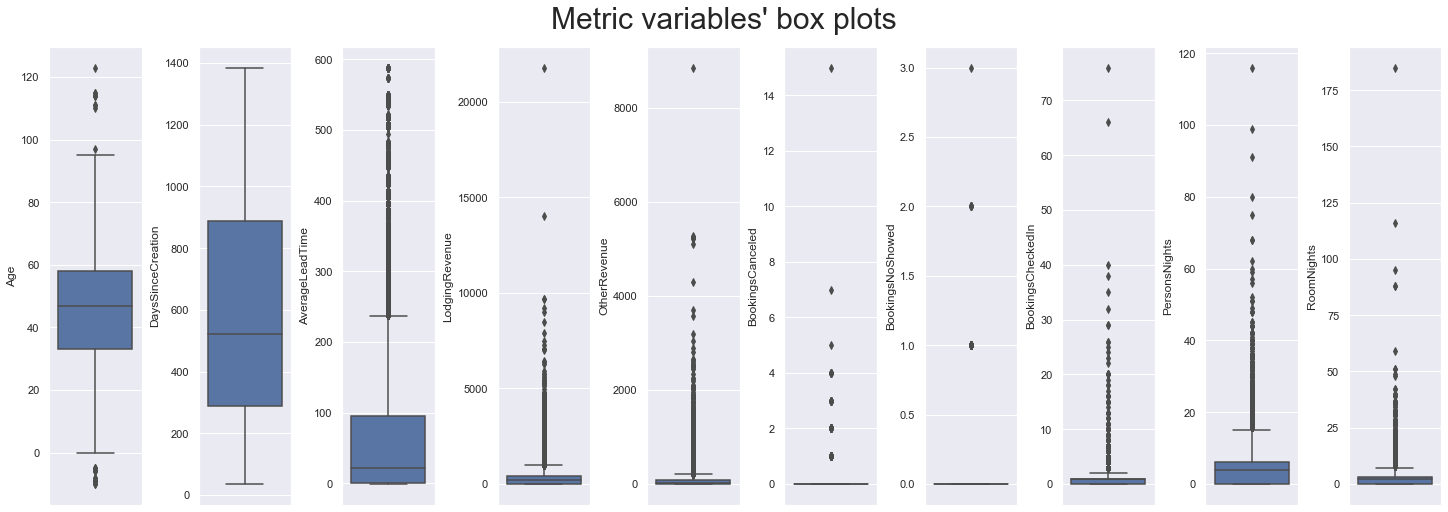

In [27]:
sns.set()

# Features to plot
plot_features = metric_df.columns.drop("ID")

# Prepare figure
fig, axes = plt.subplots(1, len(plot_features), figsize=(20,7), constrained_layout=True)
    
# Plot data
for ax, f in zip(axes, plot_features):
    sns.boxplot(y=f, data=metric_df, ax=ax)

# Layout
plt.suptitle("Metric variables' box plots", fontsize=30)

plt.show()

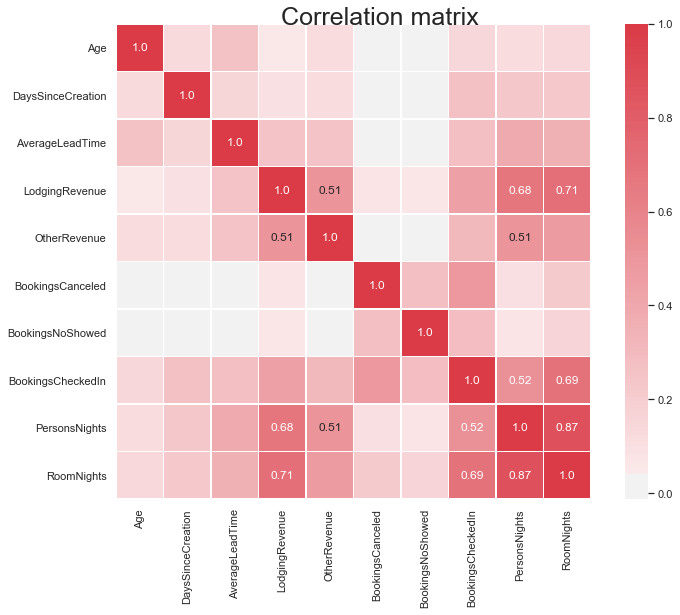

In [196]:
sns.set(style="white")

# Compute the correlation matrix
corr = metric_df.drop("ID",1).corr() #Getting correlation of numerical variables

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
# mask[np.triu_indices_from(mask)] = True #The upper-triangle array is now composed by True values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) #Make a diverging palette between two HUSL colors. Return a matplotlib colormap object.

# Pass 2D Numpy array to annot parameter
mask_annot = np.absolute(corr.values)>=0.50 # Annotate correlations above abs(0.7)
annot_arr = np.where(mask_annot, corr.values.round(2), np.full(corr.shape,""))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, annot=annot_arr, fmt="s", ax=ax)

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Correlation matrix", fontsize=25)
plt.yticks(rotation=0)
# # Fixing the bug of partially cut-off bottom and top cells
# b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
# plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

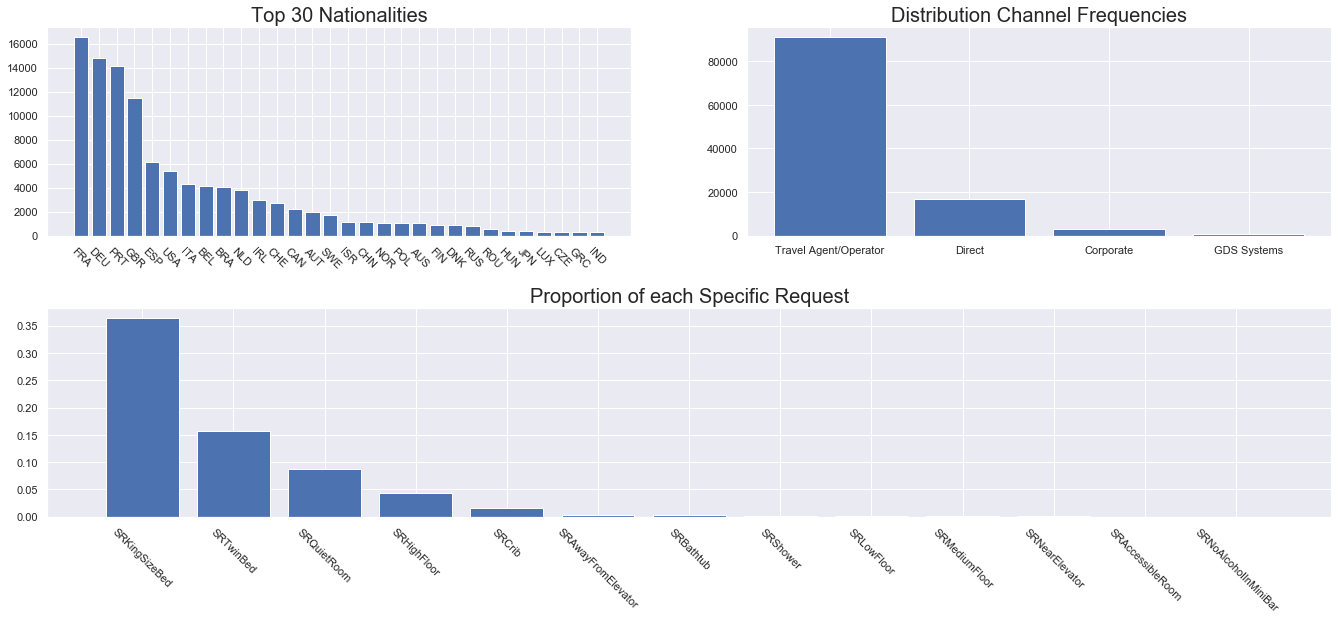

In [8]:
# data
ax1_df = df["Nationality"].value_counts()[:30]
ax2_df = df["DistributionChannel"].value_counts()
ax3_df = pd.melt(df.loc[:,df.columns.str.contains("SR")]).groupby("variable").mean().sort_values("value", ascending=False)["value"]

sns.set()

# figure
fig = plt.figure(figsize=(23,9))
gs = gspec.GridSpec(2,2) # grid specification
ax1 = fig.add_subplot(gs[0,0]) # First row, first column
ax2 = fig.add_subplot(gs[0,1]) # First row, second column
ax3 = fig.add_subplot(gs[1,:]) # Second row, all columns

# axis
ax1.bar(ax1_df.index, ax1_df.values)
ax2.bar(ax2_df.index, ax2_df.values)
ax3.bar(ax3_df.index, ax3_df.values)

# layout
ax1.set_title("Top 30 Nationalities", fontsize=20)
ax2.set_title("Distribution Channel Frequencies", fontsize=20)
ax3.set_title("Proportion of each Specific Request", fontsize=20)
for tick in ax1.get_xticklabels():
    tick.set_rotation(-45)
for tick in ax3.get_xticklabels():
    tick.set_rotation(-45)
plt.subplots_adjust(hspace=0.35)

plt.show()

# Data Cleaning

## Coherence Checks

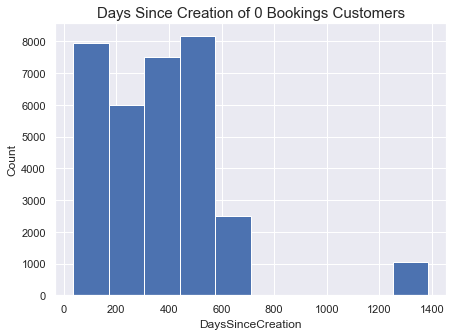

In [178]:
# We believe 0 bookings customer are old customers that were migrated from old system. Also, some of them might have been migrated from acquired hotels' systems.
fig = plt.figure(figsize=(7,5))
df.loc[((df["BookingsCanceled"]==0) & (df["BookingsNoShowed"]==0) & (df["BookingsCheckedIn"]==0)), "DaysSinceCreation"].hist()
plt.title("Days Since Creation of 0 Bookings Customers", size=15)
plt.ylabel("Count")
plt.xlabel("DaysSinceCreation")
plt.show()

In [126]:
# Deleting records that have 0 in every booking variable (was registed in the DB but never booked anything)
df_clean = df.loc[~((df["BookingsCanceled"]==0) & (df["BookingsNoShowed"]==0) & (df["BookingsCheckedIn"]==0))]
df_clean.shape

(78536, 29)

### Finding accounts from the same Customer

In [199]:
# Duplicated dochash study
a = df_clean[(df_clean.duplicated(subset=['DocIDHash','NameHash'], keep=False))]
a = a[~a.DocIDHash.isnull()]
b=a[a.duplicated(subset=['DocIDHash','NameHash','Nationality'], keep=False)]
c=a[a.duplicated(subset=['DocIDHash','NameHash','Nationality','Age'], keep=False)]
T = b.merge(c, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
T.sort_values(by='DocIDHash').head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,_merge
3778,94299,PRT,65.0,179,0xA9CDF5003C8585074B501911E57B58E505F6E6B1105D...,0x06614628F5F03C639AC1AD6A2C1BFAC7D25396129B72...,0,58.0,21.0,1,...,0,0,0,0,0,0,0,0,0,left_only
674,13326,PRT,45.0,1141,0xA9CDF5003C8585074B501911E57B58E505F6E6B1105D...,0x06614628F5F03C639AC1AD6A2C1BFAC7D25396129B72...,31,0.0,0.0,1,...,0,0,1,1,0,0,0,0,0,left_only
1815,39729,DEU,30.0,721,0xAE4050661026434CEE84C1CB88DD264BD390908013FC...,0x17ED10361077B7502854C0FCCC4A64D68825D61E599C...,517,132.8,148.0,0,...,0,0,0,0,0,0,0,0,0,left_only
1817,39783,DEU,91.0,720,0xAE4050661026434CEE84C1CB88DD264BD390908013FC...,0x17ED10361077B7502854C0FCCC4A64D68825D61E599C...,155,119.0,7.0,0,...,0,0,0,0,0,0,0,0,0,left_only
1264,25590,DEU,114.0,924,0x36BF5A087E8029783FC52501A957412690AA36E271CE...,0x1BF60C4718497A0AB8B46FF00708D3250A484DDA0FDC...,7,492.0,76.4,0,...,0,0,0,0,0,0,0,0,0,left_only


In [242]:
# we considered records from the same person when they share the same Namehash, DocIdHash and Nationality
df_clean["GroupbyId"] = df_clean["NameHash"] + df_clean["DocIDHash"] + df_clean["Nationality"]
df_clean["GroupbyId"].value_counts()

C:\Users\davids\Anaconda3\envs\busicase\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0x8DF2AF984365949E7F4EAB2EBA9BF9CA8DF106B5F2A960AD7D9A7FB4EC61D02F0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922BPRT    20
0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D8787F8C7A413529295FD500x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52PRT    15
0x5D6D35B2A085C783FB5EAA6088C9C97EE3596F2FB552E3F86410B2B9B91A03500x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003CHE    13
0x5175AC9E84362C505AED3E76F20320BE69DD1C21AA67E9B7156246CFA892423F0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855PRT    10
0xF455EE5FF579AA0F5BF353B1182654F47BA403335495293F6CF3EED822B6F9610xA89022F442F23A6D7486C47C9F968BF35898B36F0EB3531804CA4613FF33DC45CAN    10
                                                                                                                                           ..
0xF65FFB45AA63267ABE5C20FC3703BF005B38AD6D0BB19A2D3A90DA85172443B30x492D29E124D29F4DEBB09C5909E7883BB21B6F3BA0A13C5AB368AF929E557764FRA     1
0xFD3D

In [234]:
df_clean["TotalBookings"] = df_clean["BookingsCanceled"] + df_clean["BookingsNoShowed"] + df_clean["BookingsCheckedIn"]
df_clean["TotalLeadTime"] = df_clean["TotalBookings"] * df_clean["AverageLeadTime"]

C:\Users\davids\Anaconda3\envs\busicase\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\davids\Anaconda3\envs\busicase\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [324]:
gb1 = df_clean.loc[:, ["GroupbyId", "TotalBookings", "TotalLeadTime", "LodgingRevenue", "OtherRevenue","BookingsCanceled", "BookingsNoShowed", 
                 "BookingsCheckedIn", "PersonsNights", "RoomNights"]].groupby(by="GroupbyId").sum()
gb2 = df_clean.loc[:, ["GroupbyId", "Age"]].groupby(by="GroupbyId").mean()
gb3 = df_clean.loc[:, ["GroupbyId", "DaysSinceCreation"]].groupby(by="GroupbyId").max() # oldest DaysSinceCreation

# Getting ID, Nationality, NameHash and DocIDHash from oldest registed record from a customer
gb3 = pd.merge(gb3.reset_index(), df_clean[["ID", "Nationality", 'NameHash', 'DocIDHash', "GroupbyId", "DaysSinceCreation"]],
               how="left", on=["GroupbyId", "DaysSinceCreation"])
gb3 = gb3.drop_duplicates(subset=["GroupbyId", "DaysSinceCreation"]).set_index("GroupbyId") # a person might have the same GroupId and DaysSinceCreation

# Getting value of the remaining variables corresponding to the most recent registed account
gb_temp = df_clean.loc[:, ["GroupbyId", "DaysSinceCreation"]].groupby(by="GroupbyId").min() # most recent DaysSinceCreation
gb4 = pd.merge(gb_temp.reset_index(), df_clean[['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 
                                  'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom',
                                  'DistributionChannel', 'MarketSegment', "GroupbyId", "DaysSinceCreation"]],
               how="left", on=["GroupbyId", "DaysSinceCreation"])
gb4 = gb4.drop_duplicates(subset=["GroupbyId", "DaysSinceCreation"]).drop("DaysSinceCreation", axis=1).set_index("GroupbyId") # a person might have the same GroupId and DaysSinceCreation

# concatenate group by dfs
gb_df = pd.concat([gb1, gb2, gb3, gb4], axis=1).reset_index()

# calculate average lead time
gb_df["AverageLeadTime"] = gb_df["TotalLeadTime"] / gb_df["TotalBookings"]

# ordering columns
gb_df = gb_df[df_clean.columns]

# dropping columns
gb_df.drop(["GroupbyId", "TotalLeadTime"], axis=1, inplace=True)

gb_df

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalBookings
0,91332,BRA,51.0,205,0x000093906C9FA7A54C937EF1848D4AA5F79F104D8365...,0xFBB48E8A898A0973E8FC147D2AC89307B16EE4D6B618...,41.0,416.66,271.5,0,...,0,0,0,1,0,0,0,0,0,1
1,26632,CHE,25.0,908,0x0000DA6E0C98F2EA5DEE75FE5541A09A2932A0E85102...,0x7DE0876FB3F78A6C3EFB6BF57A9C61B086C4C7DC183B...,66.0,384.00,58.5,0,...,0,0,0,0,0,0,0,0,0,1
2,43208,FRA,39.0,651,0x00025D64CF323C2AA58DBC810B2B08664A7CBC28F989...,0x9035FA078B3BE036893E6CD565F1BEDD5DB562D75B68...,24.0,234.00,28.0,0,...,0,0,0,0,1,0,0,0,1,1
3,49247,DEU,42.0,576,0x00040537EF47B28CFD9E3CA98A75D543FB1A29581449...,0x7EB374B852C8D4583929799B91A6AA9E29213FFCF5D8...,8.0,432.00,21.0,0,...,0,0,0,0,0,0,0,0,0,1
4,7541,FRA,30.0,1230,0x00042DDB786F3CA782D7187AE51310DFEEF6C98BB3F5...,0xA282DFD3EAF426E820EACA6C4F6627A1487D83DBA3EE...,111.0,410.00,112.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76132,30002,AUS,35.0,860,0xFFFDCFF5DF689A85688B1D543E7A932E1EBB459D2885...,0x612B07028BA0C09635ACD3FB059EBA3CA22297CA20CD...,20.0,416.00,56.0,0,...,0,0,0,1,0,0,0,0,0,1
76133,24998,AUT,46.0,934,0xFFFED1F163EE82312A61C02A2E92893BDD526B147963...,0xC92F34F552D82B1781537A7C6456B0AB78B75346DB88...,12.0,366.00,21.0,0,...,0,0,0,0,0,0,0,0,1,1
76134,78827,PRT,NaN,348,0xFFFEF6E2E4F15DE3F04DCC807903CD6DBF51495B46F3...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,244.0,1287.90,354.0,0,...,0,0,0,1,0,0,0,0,0,1
76135,76937,ESP,37.0,363,0xFFFF0AF514527CC4611E44B3503439D53F75BD8677AA...,0xBE97A4BD91B043EEB65F10E8D20F933B9599FCD76B9B...,20.0,615.00,71.5,0,...,0,0,0,0,1,0,0,0,0,1


In [160]:
df_clean.loc[df_clean["BookingsCheckedIn"]==0]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
47034,47035,USA,38.0,599,0xF7AF83C7E570B4E929A21225DA15EDAD1EAF33C9226E...,0x2C7A2BA2FE12FC4BBA48C1D55789E2BEFC23027F05BD...,0,0.0,0.0,2,...,0,0,0,0,0,0,0,0,0,0


In [114]:
metric_df.loc[(metric_df["BookingsCheckedIn"]==0) & 
              ((metric_df["AverageLeadTime"]!=0) | (metric_df["LodgingRevenue"]!=0) | (metric_df["OtherRevenue"]!=0) | (metric_df["BookingsCanceled"]!=0) | 
               (metric_df["BookingsNoShowed"]!=0) | (metric_df["BookingsCheckedIn"]!=0) | (metric_df["PersonsNights"]!=0))]

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights
47034,47035,38.0,599,0,0.0,0.0,2,0,0,0,0
70579,70580,NaN,410,114,249.3,18.0,0,0,0,0,0
97312,97313,30.0,155,349,0.0,0.0,0,0,0,0,0


In [119]:
metric_df.loc[((metric_df["PersonsNights"]==0) & (metric_df["BookingsCanceled"]==0)) &
              ((metric_df["AverageLeadTime"]!=0) | (metric_df["LodgingRevenue"]!=0) | (metric_df["OtherRevenue"]!=0) | 
               (metric_df["BookingsNoShowed"]!=0) | (metric_df["BookingsCheckedIn"]!=0) | (metric_df["PersonsNights"]!=0))]

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights
43673,43674,33.0,641,41,267.0,109.0,0,0,1,0,4
70579,70580,NaN,410,114,249.3,18.0,0,0,0,0,0
80036,80037,35.0,336,63,242.0,24.0,0,0,1,0,2
85780,85781,67.0,259,1,314.4,141.1,0,0,1,0,3
90374,90375,52.0,214,36,2514.0,103.5,0,0,1,0,2
97312,97313,30.0,155,349,0.0,0.0,0,0,0,0,0


In [113]:
df.loc[(df["BookingsCanceled"]==0) & (df["BookingsNoShowed"]==0) & (df["BookingsCheckedIn"]==0)]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,JPN,50.0,1385,0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...,0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,FRA,43.0,1385,0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...,0x6C456E45A78A20BC794137AE326A81D587B6528B3944...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
10,11,IRL,28.0,1385,0x606584F7B9D6A1905BF9B7ED7B7EBE5DF17DF22FECDF...,0xCA46CD508DB3DB2085374141177E07ECEC4B724AE41C...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111723,111724,ITA,56.0,37,0x82277FA4AD074DA9786E64E977C94FEF1C2E47CD6212...,0x5ED6055421E857EA3496D4C75FA2237ACD353DB1B64B...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
111725,111726,PAN,60.0,37,0xAA3529E305173010BADE927C7015FA091C3883D257E9...,0xDC47997245A7B9ACF9D4974149D2100CEB00981A2F03...,0,0.0,0.0,0,...,0,0,0,0,0,1,1,0,0,0
111728,111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
111730,111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


In [95]:
metric_df.loc[(metric_df["RoomNights"]==0) & (metric_df["PersonsNights"]!=0)]

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights


## Outliers

In [13]:
df.loc[df["LodgingRevenue"]>10000,:]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
2756,2757,PRT,NaN,1315,0x382BF2A6BF57870D9831631A7ACA7B30CB42FE9FEEDF...,0xF728641F469966A5AA8906B76CC8C3083A0BDEC9F24F...,57,21781.0,1584.0,1,...,0,0,0,0,0,0,0,0,0,0
105701,105702,DNK,51.0,83,0x9AC9D968FD7FED7A9AF8C5763BCAE6D8CC64882D70E9...,0x2A6FECFD6B318B51F4F36EED34DB84A319E2FDBEFDE6...,160,14044.8,2891.5,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.loc[df["OtherRevenue"]>8000,:]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
49183,49184,PRT,45.0,577,0xAF273F4668BB4AF794C0098226948A5ADFE6E67A1A34...,0x4980A1CFF4F6AAA5846A3FC49F5EC0ED7C965C989E35...,14,1649.5,8859.25,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
df.loc[df["BookingsCanceled"]>10,:]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
11480,11481,PRT,59.0,1169,0x5208B365ECB706685A00A16D131AEAEC63208B3B5BC4...,0x6C6CBE81716B51F09ECE9AD8CBB82E1AB5175CEFBC5B...,3,195.75,87.0,15,...,0,0,0,0,1,0,0,0,0,0


In [16]:
df.loc[df["BookingsCheckedIn"]>60,:]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
2159,2160,PRT,48.0,1323,0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D87...,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,20,8493.65,2587.5,3,...,0,0,0,0,1,0,0,0,0,0
11480,11481,PRT,59.0,1169,0x5208B365ECB706685A00A16D131AEAEC63208B3B5BC4...,0x6C6CBE81716B51F09ECE9AD8CBB82E1AB5175CEFBC5B...,3,195.75,87.0,15,...,0,0,0,0,1,0,0,0,0,0


In [17]:
df.loc[df["RoomNights"]>125,:]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
2756,2757,PRT,NaN,1315,0x382BF2A6BF57870D9831631A7ACA7B30CB42FE9FEEDF...,0xF728641F469966A5AA8906B76CC8C3083A0BDEC9F24F...,57,21781.0,1584.0,1,...,0,0,0,0,0,0,0,0,0,0


* Client ID 2757 appears as a potential outlier in both RoomNights and LodgingRevenue.
* Client ID 11481 appears as a potential outlier in both BookingsCheckedIN and BookingsCanceled.

## Missing Values

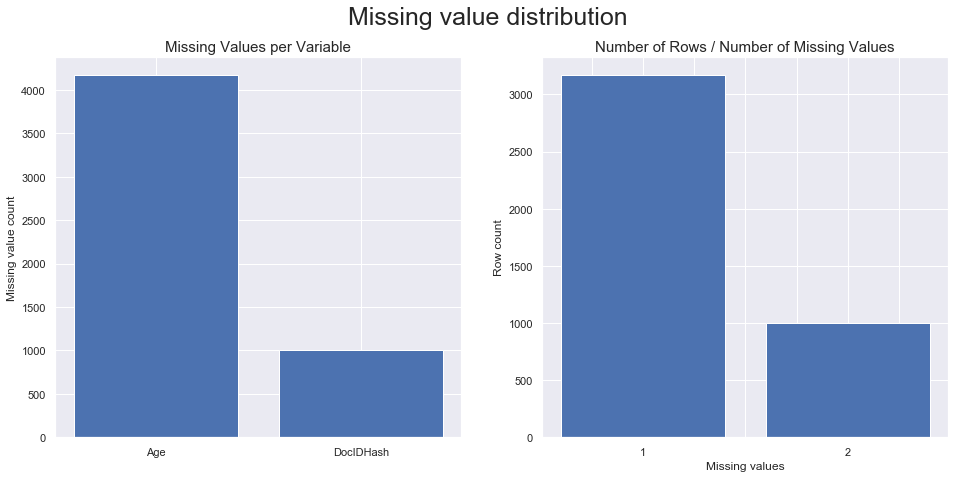

In [18]:
sns.set()

# data
ax1_df = df.isna().sum().sort_values(ascending=False)
ax2_df = df.isna().apply(lambda x:sum(x), axis=1).value_counts().sort_index().drop(0, axis=0)

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))

# axis
ax1.bar(x=ax1_df[ax1_df!=0].index, height=ax1_df[ax1_df!=0])
ax2.bar(x=ax2_df.index, height=ax2_df)

# layout
plt.suptitle("Missing value distribution", fontsize=25)
ax1.set_ylabel("Missing value count")
ax1.set_title("Missing Values per Variable", fontsize=15)
ax2.set_xlabel("Missing values")
ax2.set_ylabel("Row count")
ax2.set_xticklabels(["","",1,"","","",2])
ax2.set_title("Number of Rows / Number of Missing Values", fontsize=15)

plt.show()